In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# برای نمایش بهتر نمودارها
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [17]:
# 1. بارگذاری داده‌ها
ratings = pd.read_csv('./../data/raw/MovieLens/ratings.dat', sep='::', engine='python', names=['userId', 'movieId', 'rating', 'timestamp'])
movies = pd.read_csv('./../data/raw/MovieLens/movies.dat', sep='::', engine='python', names=['movieId', 'title', 'genres'], encoding='latin-1')


In [18]:
# 2. بررسی اجمالی
print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)

Ratings shape: (1000209, 4)
Movies shape: (3883, 3)


In [19]:
# اگر خواستی ردیف‌های تکراری رو حذف کن
movies_no_duplicates = movies.drop_duplicates()
print("Rows after removing duplicates:", movies_no_duplicates.shape[0])

print("\nSample ratings:")
print(ratings.head())

print("\nSample movies:")
print(movies.head())

Rows after removing duplicates: 3883

Sample ratings:
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Sample movies:
   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [20]:
# 3. تمیزکاری
print("\nMissing values in ratings:")
print(ratings.isnull().sum())
print("\nData types:")
print(ratings.dtypes)


Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Data types:
userId       int64
movieId      int64
rating       int64
timestamp    int64
dtype: object


In [21]:
# 4. آمار توصیفی
print("\nDescriptive statistics for ratings:")
print(ratings['rating'].describe())


Descriptive statistics for ratings:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


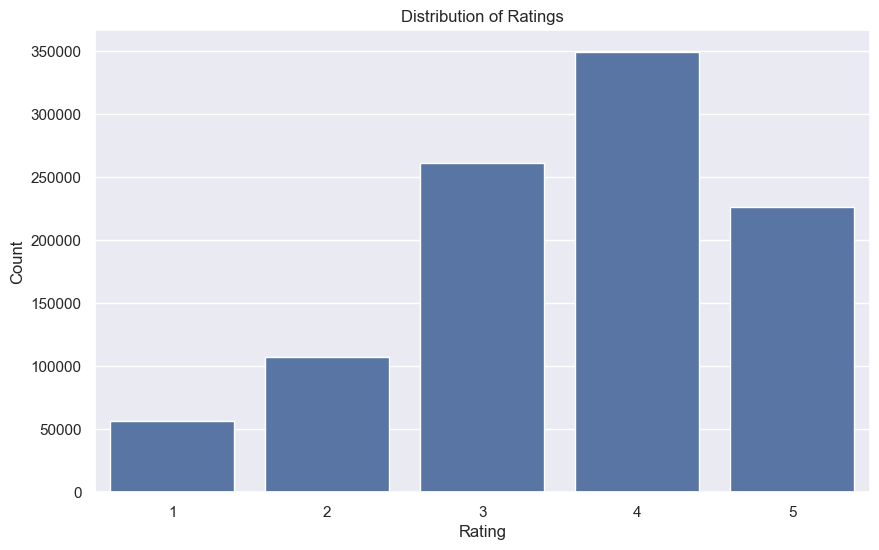

In [22]:
# 5. بررسی توزیع رتبه‌ها
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [23]:
# 6. تعداد کل فیلم‌ها و کاربران
num_movies = ratings['movieId'].nunique()
num_users = ratings['userId'].nunique()
print(f"Number of unique movies: {num_movies}")
print(f"Number of unique users: {num_users}")

Number of unique movies: 3706
Number of unique users: 6040


C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_6228\440609516.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, y='title', x='num_ratings', palette='viridis')


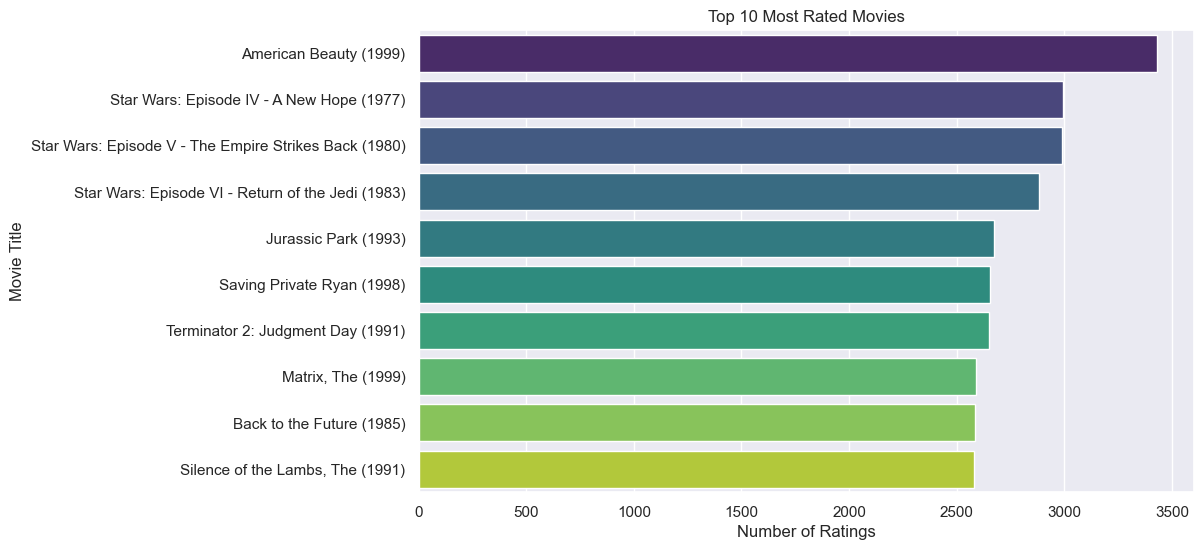

In [24]:
# 7. محبوب‌ترین فیلم‌ها
rating_counts = ratings['movieId'].value_counts().head(10)
top_movies = movies[movies['movieId'].isin(rating_counts.index)]

top_movies = top_movies.merge(rating_counts.rename('num_ratings'), on='movieId')
top_movies = top_movies.sort_values(by='num_ratings', ascending=False)

sns.barplot(data=top_movies, y='title', x='num_ratings', palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_6228\52345418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg, y='title', x='rating', palette='magma')


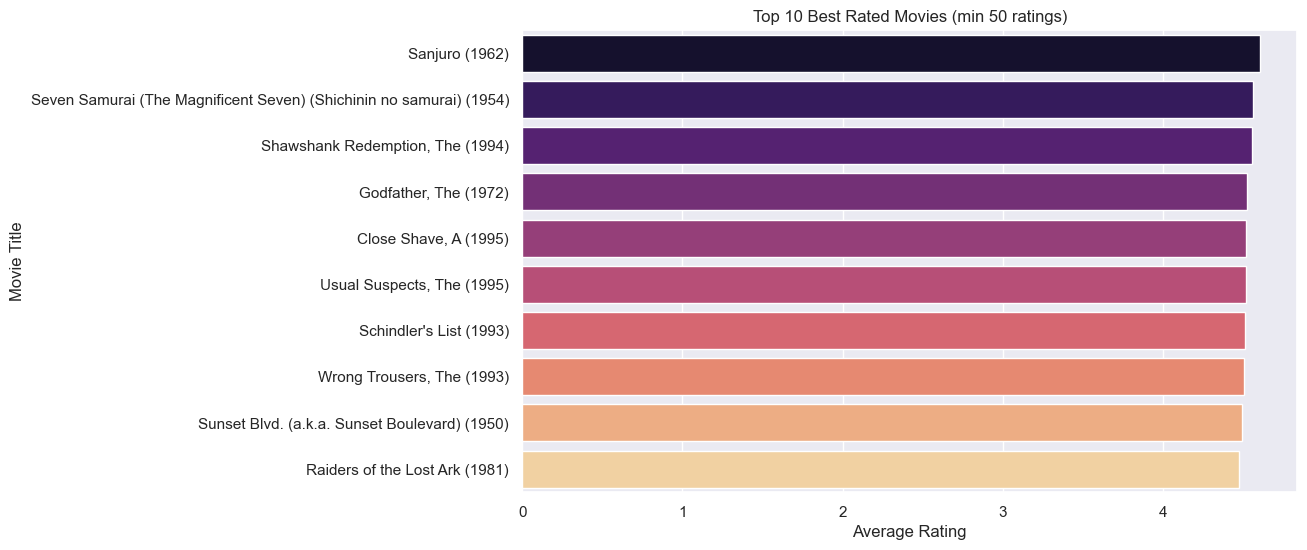

In [25]:
# 8. میانگین رتبه هر فیلم (با فیلتر برای حداقل تعداد رای)
mean_ratings = ratings.groupby('movieId').agg({'rating': 'mean', 'userId': 'count'})
mean_ratings = mean_ratings.rename(columns={'userId': 'rating_count'})
filtered = mean_ratings[mean_ratings['rating_count'] >= 50]
top_avg = filtered.sort_values(by='rating', ascending=False).head(10)

top_avg = top_avg.merge(movies, on='movieId')

sns.barplot(data=top_avg, y='title', x='rating', palette='magma')
plt.title('Top 10 Best Rated Movies (min 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()